In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('complete_dataset.csv')

In [3]:
print("Dataset Information:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB
None

First 5 rows:
         date      demand        RRP  demand_pos_RRP  RRP_pos

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())


Missing Values:
date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

Summary Statistics:
              demand          RRP  demand_pos_RRP  RRP_positive  \
count    2106.000000  2106.000000     2106.000000   2106.000000   
mean   120035.476503    76.079554   119252.305055     76.553847   
std     13747.993761   130.246805    14818.631319    130.114184   
min     85094.375000    -6.076028    41988.240000     13.568986   
25%    109963.650000    38.707040   109246.250000     39.117361   
50%    119585.912500    66.596738   119148.082500     66.869058   
75%    130436.006250    95.075012   130119.477500     95.130181   
max    170653.840000  4549.645105   170653.840000   4549.645105   

       demand_neg_RRP  RRP_negative  frac_at_neg_RR

In [5]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [6]:
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
date               2106
demand             2106
RRP                2106
demand_pos_RRP     2106
RRP_positive       2106
demand_neg_RRP      192
RRP_negative        179
frac_at_neg_RRP      21
min_temperature     211
max_temperature     283
solar_exposure      316
rainfall            105
school_day            2
holiday               2
dtype: int64


C:\Users\swaralid\AppData\Local\Temp\ipykernel_23516\1521828615.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


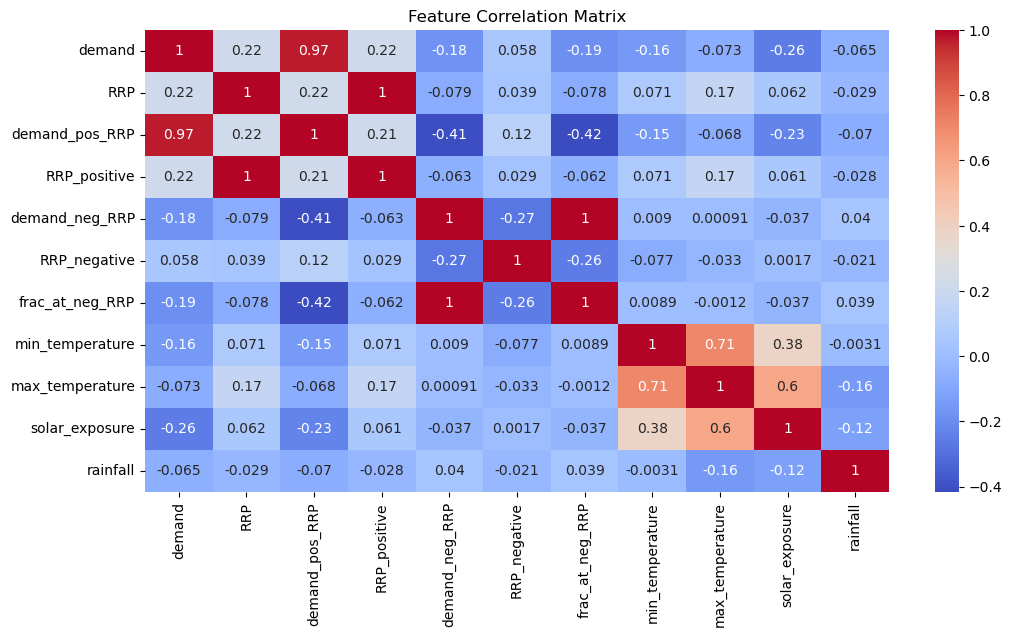

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


date – The date of the recorded data.

demand – The total demand 

RRP – Recommended Retail Price 

demand_pos_RRP – Demand when RRP is positive.

RRP_positive – Positive RRP values 

demand_neg_RRP – Demand when RRP is negative.

RRP_negative – Negative RRP values 

frac_at_neg_RRP – Fraction of demand occurring at negative RRP 

min_temperature – Minimum daily temperature 

max_temperature – Maximum daily temperature

solar_exposure – Solar radiation exposure 

rainfall – Total daily rainfall 

school_day – Whether it was a school day.

holiday – Whether it was a holiday 

1. Strong Positive Correlation Between demand and demand_pos_RRP (0.97)

2. High Positive Correlation Between min_temperature and max_temperature (0.71)

3. Negative Correlation Between solar_exposure and frac_at_neg_RRP (-0.26)

4. Low Correlation Between rainfall and Demand (-0.065)

<Figure size 1500x800 with 0 Axes>

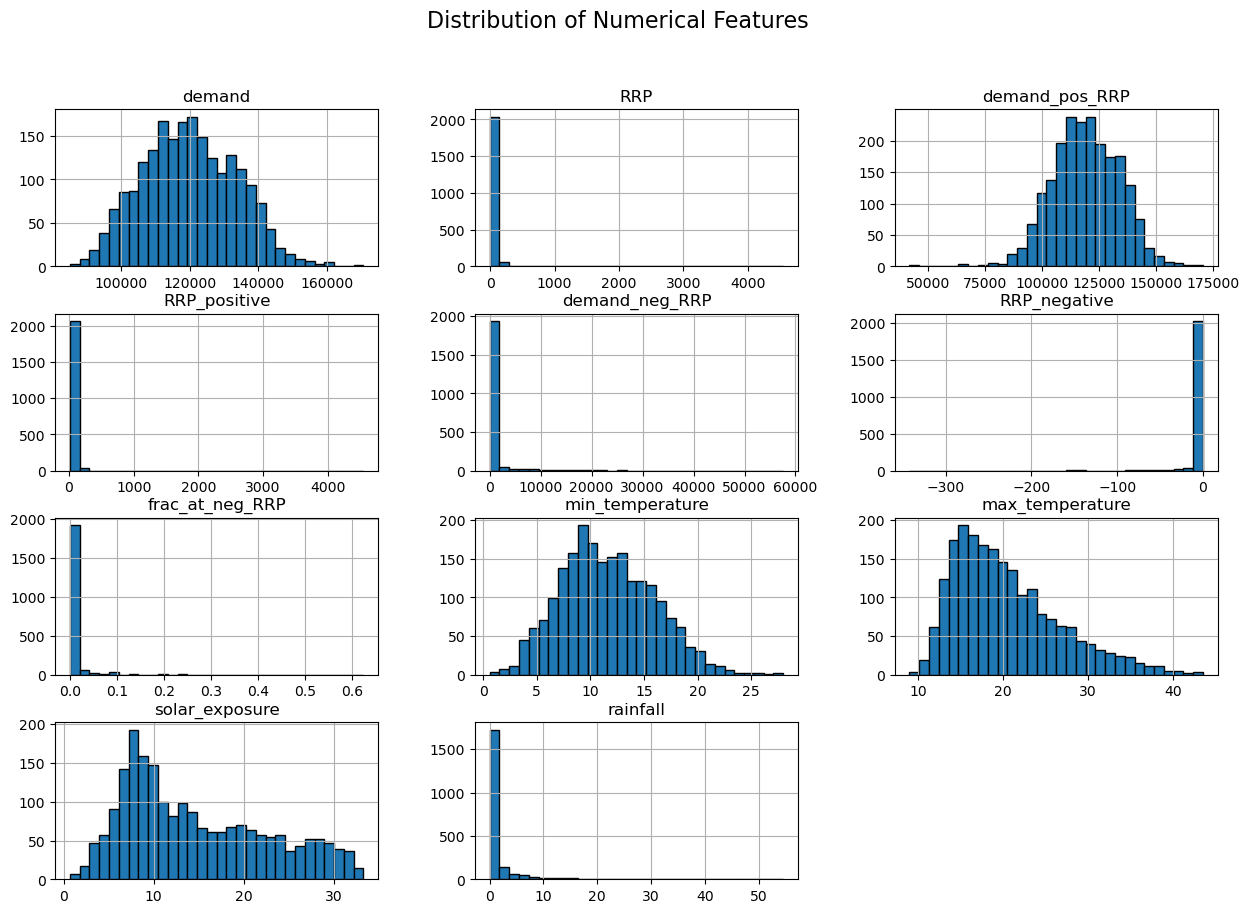

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

numerical_columns = df.select_dtypes(include=['float64']).columns
df[numerical_columns].hist(figsize=(15, 10), bins=30, edgecolor='black')

plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

Observations from distributions:
Highly skewed features:
RRP, RRP_positive, and RRP_negative have extreme positive skews.
demand_neg_RRP and frac_at_neg_RRP are mostly zero,imbalanced distributions.
Potential Outliers:
RRP has values exceeding 4000, which is extreme.
rainfall is mostly 0, except for a few high peaks.

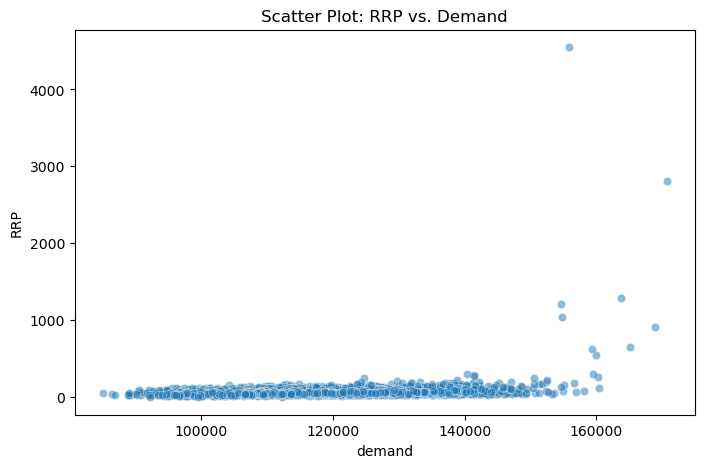

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='demand', y='RRP', alpha=0.5)
plt.title("Scatter Plot: RRP vs. Demand")
plt.show()

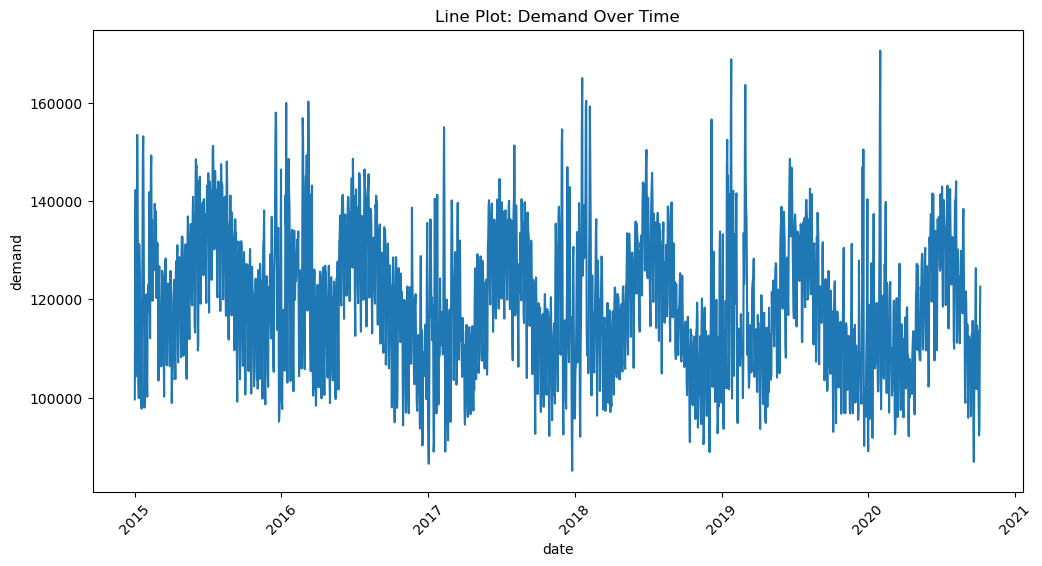

In [14]:
df['date'] = pd.to_datetime(df['date'])
#demand over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='demand')
plt.title("Line Plot: Demand Over Time")
plt.xticks(rotation=45)
plt.show()

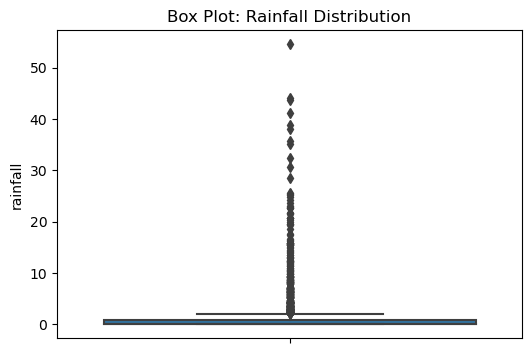

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, y='rainfall')
plt.title("Box Plot: Rainfall Distribution")
plt.show()

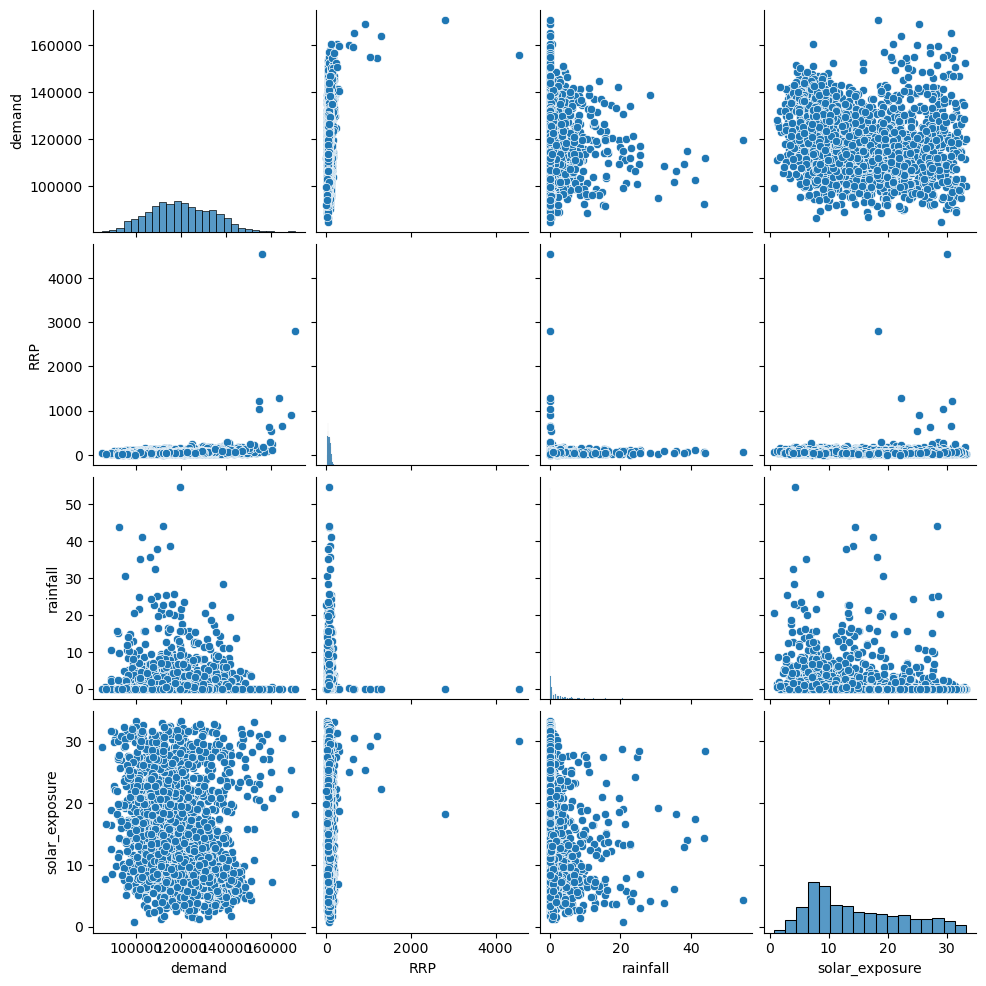

In [19]:
sns.pairplot(df[['demand', 'RRP', 'rainfall', 'solar_exposure']])
plt.show()